# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')
library('ggrepel')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
data_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv"

df_vacc = read_csv(data_url, col_types = cols())

df_vacc |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [3]:
# create the df_vacc_rates here

df_vacc_rates = df_vacc |>
    filter(mmr >= 0) |>
    group_by(state) |>
    summarize(nVacc = sum(mmr >= 95, na.rm=TRUE), nTotal = n()) |>
    mutate(rate = nVacc / nTotal) |>
    arrange(state)


df_vacc_rates

state,nVacc,nTotal,rate
<chr>,<int>,<int>,<dbl>
Arizona,593,1171,0.506404782
Arkansas,2,567,0.003527337
California,12639,14225,0.888506151
Colorado,939,1507,0.623092236
Connecticut,478,589,0.811544992
Illinois,6893,7686,0.896825397
Maine,169,357,0.473389356
Massachusetts,826,954,0.865828092
Minnesota,755,1593,0.473948525


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [4]:
df_vacc_rates |>
    slice_min(order_by = rate, n=1)

state,nVacc,nTotal,rate
<chr>,<int>,<int>,<dbl>
Arkansas,2,567,0.003527337


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [5]:
df_vacc |>
    group_by(state) |>
    summarize(count = n()) |>
    arrange(state) |>
    head()

state,count
<chr>,<int>
Arizona,1451
Arkansas,567
California,16098
Colorado,1509
Connecticut,795
Florida,2678


In [69]:
df_vacc_nc = df_vacc |>
    filter(state == "North Carolina") |>
    arrange(overall) |>
    mutate(yaxis = row_number() / n())

df_vacc_nc |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,yaxis
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1767,North Carolina,2018-19,Renaissance Montessori Sch. of Cary,NA,NA,Wake,NA,4,-1,-1.0,NA,NA,NA,35.76823,-78.74369,0.0004796163
1766,North Carolina,2018-19,Annunciation Catholic,NA,NA,Craven,NA,23,-1,21.7,NA,NA,NA,34.87682,-76.90448,0.0009592326
1765,North Carolina,2018-19,Starmount Acad of Excellence,NA,NA,Mecklenburg,NA,77,-1,40.3,NA,NA,NA,35.13929,-80.87051,0.0014388489
1764,North Carolina,2018-19,Spruce Pine Montessori,NA,NA,Mitchell,NA,7,-1,42.9,NA,NA,NA,35.91674,-82.06719,0.0019184652
1763,North Carolina,2018-19,Moyock Elementary,NA,NA,Currituck,NA,85,-1,43.5,NA,NA,NA,36.52490,-76.17366,0.0023980815
1762,North Carolina,2018-19,Liberty Christian,NA,NA,Durham,NA,20,-1,45.0,NA,5,NA,36.06362,-78.92544,0.0028776978


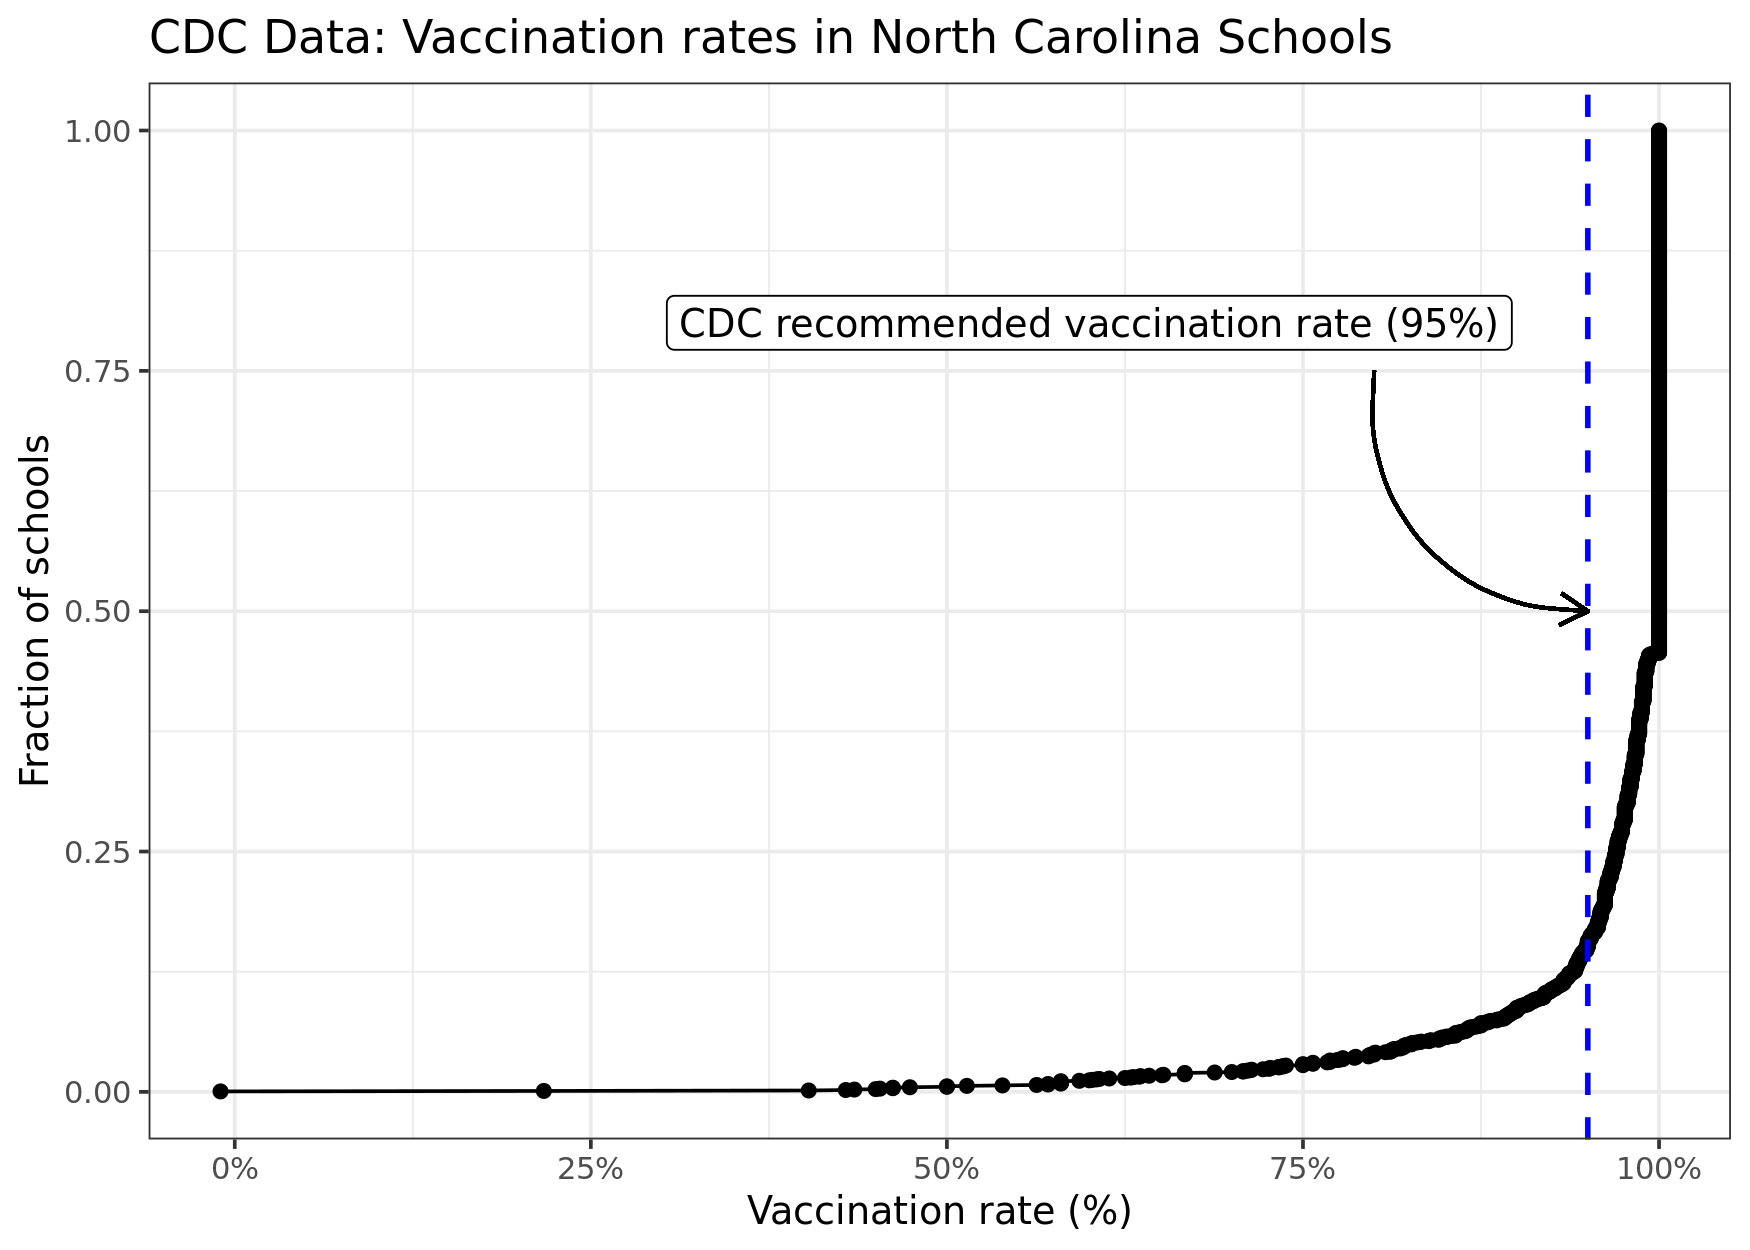

In [110]:
options(repr.plot.res = 250, repr.plot.height = 5)

# df_vacc_nc |> head()

ncSchoolVacc = ggplot(df_vacc_nc, aes(x = overall/100, y = yaxis)) +
    # stat_ecdf(geom = "step") +
    # stat_ecdf(geom = "point") +
    geom_line() +
    geom_point() +
    scale_x_continuous(labels=scales::percent_format()) +
    geom_vline(xintercept = .95, linetype='dashed', size = .75, color = "blue") +
    theme_bw() +
    labs(x = 'Vaccination rate (%)', y = 'Fraction of schools', title = "CDC Data: Vaccination rates in North Carolina Schools") +
    geom_label(aes(x = .6, y = .8, label = "CDC recommended vaccination rate (95%)"), stat = "unique") +
    geom_curve(aes(x = 0.8, y = 0.75, xend = 0.95, yend = 0.5),arrow = arrow(length = unit(0.03, "npc")))
   
ncSchoolVacc

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [111]:
medianVaxNC = median(df_vacc_nc$overall)
medianVaxNC

#Yes, the median vax in NC is above the CDC recommended target

[1] 100